<a href="https://colab.research.google.com/github/fabiodemo/Tensorflow-Developer-Certificate/blob/main/Computer%20VIsion%20and%20Convolutional%20Neural%20Networks/Multi_class_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-class Image Classification
1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5.Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied

## 1. Visualize the data

In [1]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-03-06 23:51:30--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.207, 74.125.68.207, 64.233.170.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  21.5MB/s    in 25s     

2024-03-06 23:51:55 (20.0 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 

In [3]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [4]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [5]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


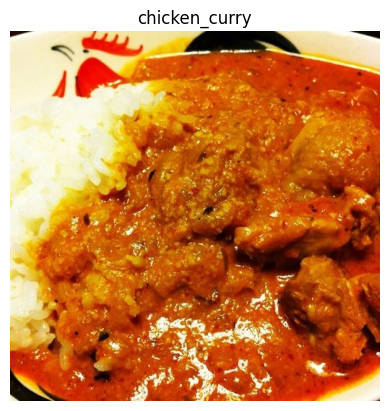

In [6]:
# View a random image from the training dataset
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

In [7]:
# View the image shape
img.shape # returns (width, height, colour channels)

(512, 512, 3)

## 2. Preprocess the data (prepare it for a model)

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. Create a model (start with a baseline)


In [9]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [30]:
# Create our model (a clone of model_8, except to be multi-class)
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_9.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

## 4. Fit the model


In [31]:
# Fit the model
history_9 = model_9.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 38s 157ms/step - loss: 2.2147 - accuracy: 0.1844 - val_loss: 2.0905 - val_accuracy: 0.2472
Epoch 2/5
235/235 [==============================] - 33s 142ms/step - loss: 1.9167 - accuracy: 0.3357 - val_loss: 1.8533 - val_accuracy: 0.3452
Epoch 3/5
235/235 [==============================] - 29s 124ms/step - loss: 1.4976 - accuracy: 0.5017 - val_loss: 2.0465 - val_accuracy: 0.3124
Epoch 4/5
235/235 [==============================] - 34s 144ms/step - loss: 0.8799 - accuracy: 0.7111 - val_loss: 2.4661 - val_accuracy: 0.2976
Epoch 5/5
235/235 [==============================] - 31s 132ms/step - loss: 0.3514 - accuracy: 0.8919 - val_loss: 3.5092 - val_accuracy: 0.2964


## 5. Evaluate the model


In [32]:
model_9.evaluate(test_data)

79/79 [==============================] - 8s 104ms/step - loss: 3.5092 - accuracy: 0.2964


[3.5091640949249268, 0.2964000105857849]

In [13]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot the accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

The model is **overfitting** the training set quite badly.

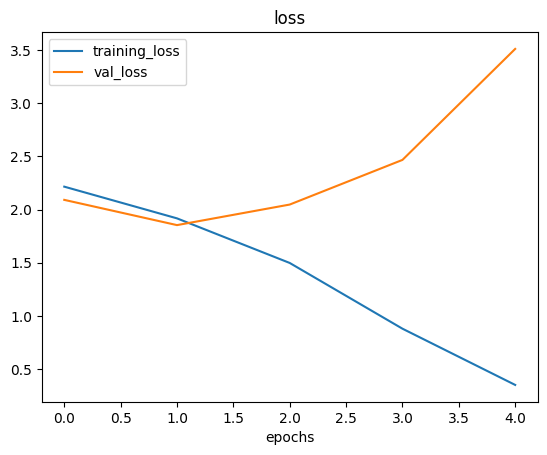

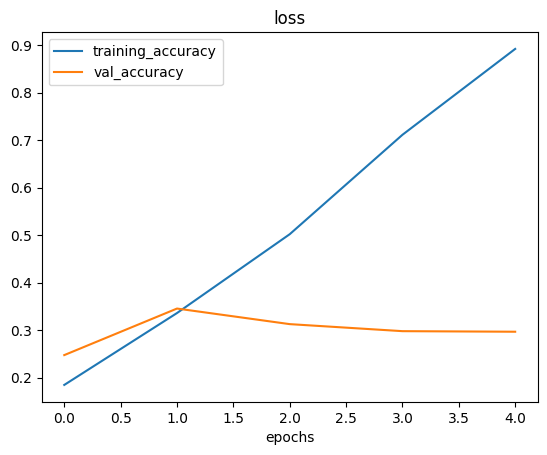

In [33]:
plot_loss_curves(history_9)

## 6. Adjust different parameters and improve model (try to beat your baseline)


In [18]:
history_9 = model_9.fit(train_data,
              epochs=5,
              steps_per_epoch=len(train_data),
              validation_data=test_data,
              validation_steps=int(0.25 * len(test_data)))

Epoch 1/5
235/235 [==============================] - 26s 105ms/step - loss: 2.2141 - accuracy: 0.2101 - val_loss: 2.0108 - val_accuracy: 0.2780
Epoch 2/5
235/235 [==============================] - 23s 96ms/step - loss: 1.8556 - accuracy: 0.3621 - val_loss: 1.9560 - val_accuracy: 0.3125
Epoch 3/5
235/235 [==============================] - 23s 98ms/step - loss: 1.5272 - accuracy: 0.4909 - val_loss: 2.0522 - val_accuracy: 0.3191
Epoch 4/5
235/235 [==============================] - 23s 97ms/step - loss: 1.0751 - accuracy: 0.6553 - val_loss: 2.3459 - val_accuracy: 0.2549
Epoch 5/5
235/235 [==============================] - 24s 103ms/step - loss: 0.6419 - accuracy: 0.8037 - val_loss: 2.7229 - val_accuracy: 0.3026


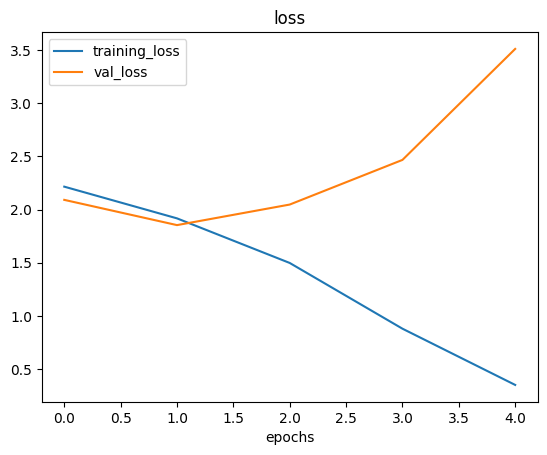

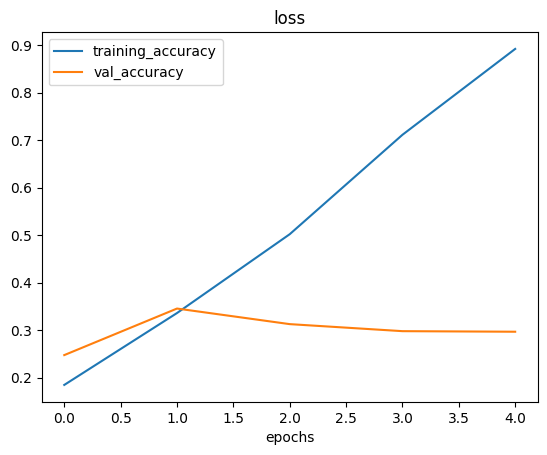

In [42]:
plot_loss_curves(history_9)

In [34]:
# Try a simplified model (removed two layers)
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 30s 120ms/step - loss: 2.2481 - accuracy: 0.1836 - val_loss: 2.0968 - val_accuracy: 0.2476
Epoch 2/5
235/235 [==============================] - 35s 148ms/step - loss: 1.8927 - accuracy: 0.3448 - val_loss: 2.0060 - val_accuracy: 0.3032
Epoch 3/5
235/235 [==============================] - 36s 152ms/step - loss: 1.5443 - accuracy: 0.4816 - val_loss: 2.0130 - val_accuracy: 0.3148
Epoch 4/5
235/235 [==============================] - 35s 150ms/step - loss: 1.0679 - accuracy: 0.6575 - val_loss: 2.2350 - val_accuracy: 0.2824
Epoch 5/5
235/235 [==============================] - 33s 142ms/step - loss: 0.5848 - accuracy: 0.8339 - val_loss: 2.7135 - val_accuracy: 0.2828


In [35]:
model_10.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 29160)             0         
                                                                 
 dense_3 (Dense)             (None, 10)               

In [36]:
model_9.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_7 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_9 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

Looks like "simplifying the model" didn't work, the accuracy wen down and overfitting continued.

### Trying to reduce overfitting with data augmentation

In [37]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [38]:
# Clone the model (use the same architecture)
model_11 = tf.keras.models.clone_model(model_10)

# Compile the cloned model (same setup as used for model_10)
model_11.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_11 = model_11.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 131s 553ms/step - loss: 2.2136 - accuracy: 0.1901 - val_loss: 1.9981 - val_accuracy: 0.2764
Epoch 2/5
235/235 [==============================] - 136s 579ms/step - loss: 2.0850 - accuracy: 0.2637 - val_loss: 2.0014 - val_accuracy: 0.2960
Epoch 3/5
235/235 [==============================] - 129s 551ms/step - loss: 2.0283 - accuracy: 0.2833 - val_loss: 1.8979 - val_accuracy: 0.3332
Epoch 4/5
235/235 [==============================] - 132s 561ms/step - loss: 2.0057 - accuracy: 0.3005 - val_loss: 1.8606 - val_accuracy: 0.3416
Epoch 5/5
235/235 [==============================] - 107s 456ms/step - loss: 1.9819 - accuracy: 0.3160 - val_loss: 1.8598 - val_accuracy: 0.3548


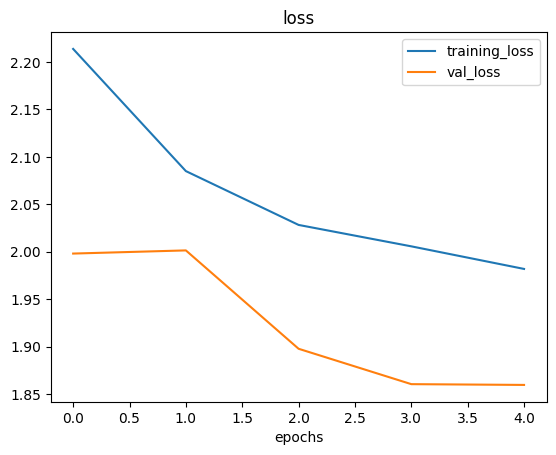

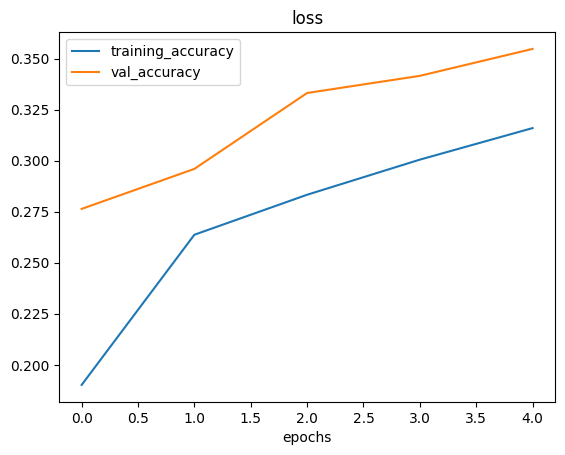

In [39]:
# Check out our model's performance with augmented data
plot_loss_curves(history_11)

## 7. Repeat until satisfied

In [40]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [41]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [47]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [48]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Check for multiclass and get pred_class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])]


  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

### Testing model 9

1/1 [==============================] - 1s 679ms/step


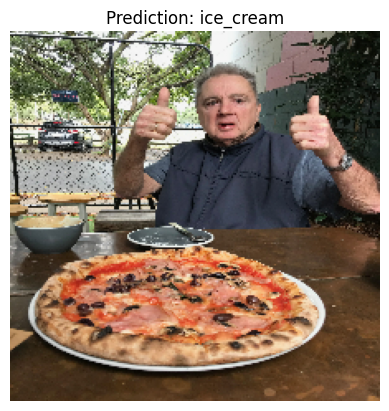

In [53]:
pred_and_plot(model_9, '03-pizza-dad.jpeg', class_names)

1/1 [==============================] - 0s 34ms/step


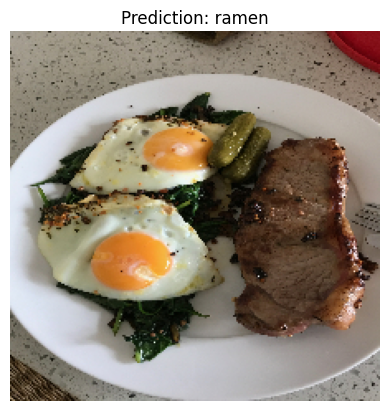

In [54]:
pred_and_plot(model_10, '03-steak.jpeg', class_names)

### Testing model 10

1/1 [==============================] - 0s 213ms/step


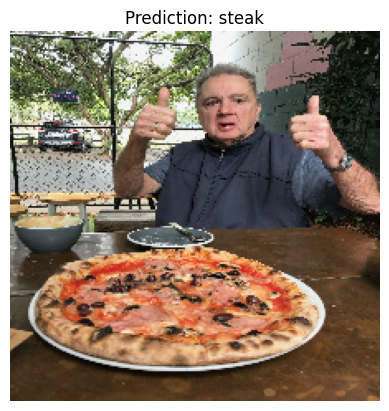

In [49]:
pred_and_plot(model_10, '03-pizza-dad.jpeg', class_names)

1/1 [==============================] - 0s 17ms/step


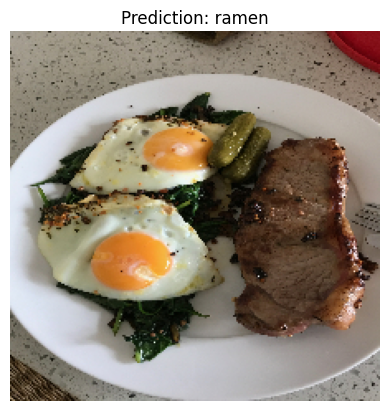

In [50]:
pred_and_plot(model_10, '03-steak.jpeg', class_names)

1/1 [==============================] - 0s 18ms/step


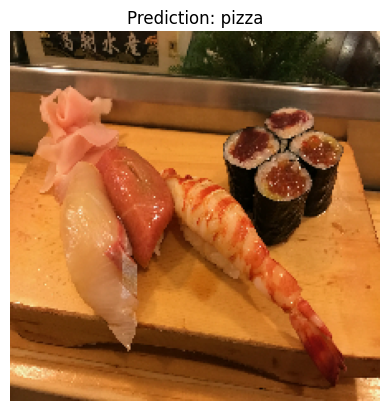

In [51]:
pred_and_plot(model_10, '03-sushi.jpeg', class_names)

1/1 [==============================] - 0s 17ms/step


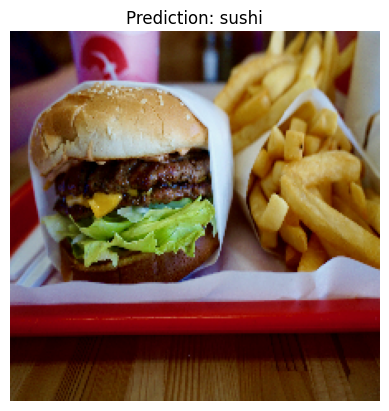

In [52]:
pred_and_plot(model_10, '03-hamburger.jpeg', class_names)

# Saving and loading our model

In [55]:
model_10.save("save_trained_model_10")

In [56]:
loaded_model_10 = tf.keras.models.load_model("save_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 8s 96ms/step - loss: 2.7135 - accuracy: 0.2828


[2.7135252952575684, 0.28279998898506165]

In [58]:
# Comparing to our existing lodaded model
model_10.evaluate(test_data)

79/79 [==============================] - 10s 131ms/step - loss: 2.7135 - accuracy: 0.2828


[2.7135252952575684, 0.28279998898506165]